
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Validation of the total water level

inputs required: 
  * historical wave conditions
  * emulator output - synthetic wave conditions of TWL 
  * emulator output - synthetic wave conditions of TWL with 3 scenarios of SLR


in this notebook:
  * Comparison of the extreme distributions
  


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.climate_emulator import Climate_Emulator
from teslakit.extremes import Peaks_Over_Threshold as POT
from teslakit.util.time_operations import xds_reindex_daily

from teslakit.plotting.extremes import Plot_ReturnPeriodValidation_CC
from teslakit.plotting.estela import Plot_DWTs_Probs
from teslakit.plotting.wts import Plot_Probs_WT_WT
from teslakit.plotting.outputs import Plot_LevelVariables_Histograms



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'

# offshore
db = Database(p_data)
db.SetSite('ROI')

# climate change - S1
db_S1 = Database(p_data)
db_S1.SetSite('ROI_CC_S1')

# climate change - S2
db_S2 = Database(p_data)
db_S2.SetSite('ROI_CC_S2')

# climate change - S3
db_S3 = Database(p_data)
db_S3.SetSite('ROI_CC_S3')



In [3]:
# --------------------------------------
# Load complete hourly data for extremes analysis

# Historical
HIST_C_h = db.Load_HIST_OFFSHORE(vns=['TWL'],decode_times=True)

# Simulation (1000 yrs)
SIM_C_h = db.Load_SIM_OFFSHORE_all(vns=['TWL'], decode_times=True, use_cftime=True)

# Simulation climate change S1 (100 yrs)
SIM_C_h_CChange_S1 = db_S1.Load_SIM_OFFSHORE_all(decode_times=True, use_cftime=True)

# Simulation climate change S2 (100 yrs)
SIM_C_h_CChange_S2 = db_S2.Load_SIM_OFFSHORE_all(decode_times=True, use_cftime=True)

# Simulation climate change S3 (100 yrs)
SIM_C_h_CChange_S3 = db_S3.Load_SIM_OFFSHORE_all(decode_times=True, use_cftime=True)


In [4]:
# Keep first 100 years of simulation without climate change
SIM_C_h = SIM_C_h.isel(time=slice(0, len(SIM_C_h_CChange_S1.time))) # 100 years



## Level Variables (TWL) - Histograms

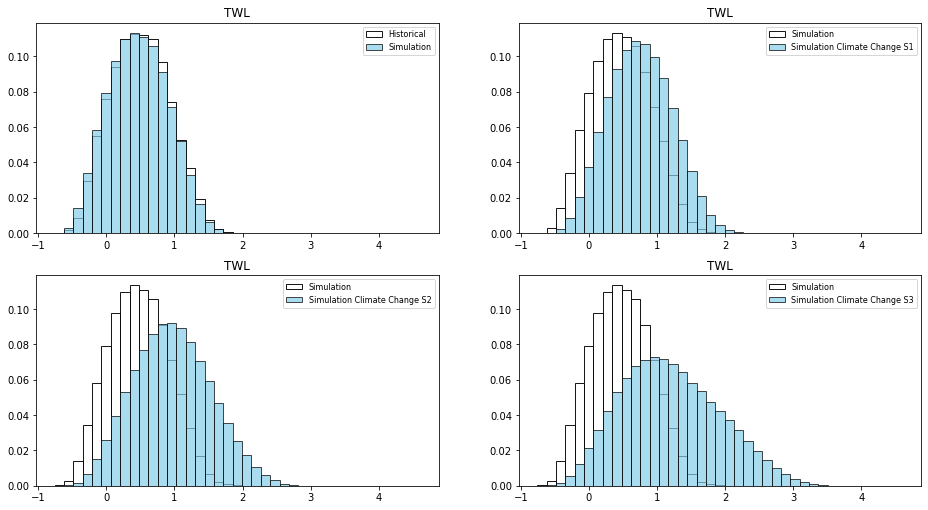

In [5]:
from teslakit.plotting.outputs import axplot_compare_histograms
from teslakit.plotting.config import _faspect, _fsize
import matplotlib.gridspec as gridspec

# Plot TWL histogram comparison between historical and simulated data for different SLR scenarios

data_fit = HIST_C_h['TWL'].values[:]; data_fit = data_fit[~np.isnan(data_fit)]
data_sim = SIM_C_h['TWL'].sel(n_sim = 0).values[:]; data_sim = data_sim[~np.isnan(data_sim)]
data_sim_1 = SIM_C_h_CChange_S1['TWL'].sel(n_sim = 0).values[:]; data_sim_1 = data_sim_1[~np.isnan(data_sim_1)]
data_sim_2 = SIM_C_h_CChange_S2['TWL'].sel(n_sim = 0).values[:]; data_sim_2 = data_sim_2[~np.isnan(data_sim_2)]
data_sim_3 = SIM_C_h_CChange_S3['TWL'].sel(n_sim = 0).values[:]; data_sim_3 = data_sim_3[~np.isnan(data_sim_3)]


# plot figure
fig = plt.figure(figsize=(_faspect*_fsize, _fsize*2/2.3))
gs = gridspec.GridSpec(2, 2)  
n_bins = np.linspace(np.nanmin([np.nanmin(data_fit), np.nanmin(data_sim_3)]),np.nanmax([np.nanmax(data_fit), np.nanmax(data_sim_3)]), 40)

ax = plt.subplot(gs[0, 0])
axplot_compare_histograms(ax, data_fit, data_sim, ttl='TWL', n_bins=n_bins,
    color_1='white', color_2='skyblue', alpha_1=0.9, alpha_2=0.7,
    label_1='Historical', label_2='Simulation')

ax = plt.subplot(gs[0, 1])
axplot_compare_histograms(ax, data_sim, data_sim_1, ttl='TWL', n_bins=n_bins,
    color_1='white', color_2='skyblue', alpha_1=0.9, alpha_2=0.7,
    label_1='Simulation', label_2='Simulation Climate Change S1')

ax = plt.subplot(gs[1, 0])
axplot_compare_histograms(ax, data_sim, data_sim_2, ttl='TWL', n_bins=n_bins,
    color_1='white', color_2='skyblue', alpha_1=0.9, alpha_2=0.7,
    label_1='Simulation', label_2='Simulation Climate Change S2')

ax = plt.subplot(gs[1, 1])
axplot_compare_histograms(ax, data_sim, data_sim_3, ttl='TWL', n_bins=n_bins,
    color_1='white', color_2='skyblue', alpha_1=0.9, alpha_2=0.7,
    label_1='Simulation', label_2='Simulation Climate Change S3')




## TWL - Annual Maxima for different SLR scenarios

In [6]:
# Plot TWL annual maxima

# calculate Annual Maxima values for historical and simulated data
hist_A = HIST_C_h['TWL'].groupby('time.year').max(dim='time')
sim_A = SIM_C_h['TWL'].groupby('time.year').max(dim='time')

### SLR S1 (intermediate low, +0.5m)

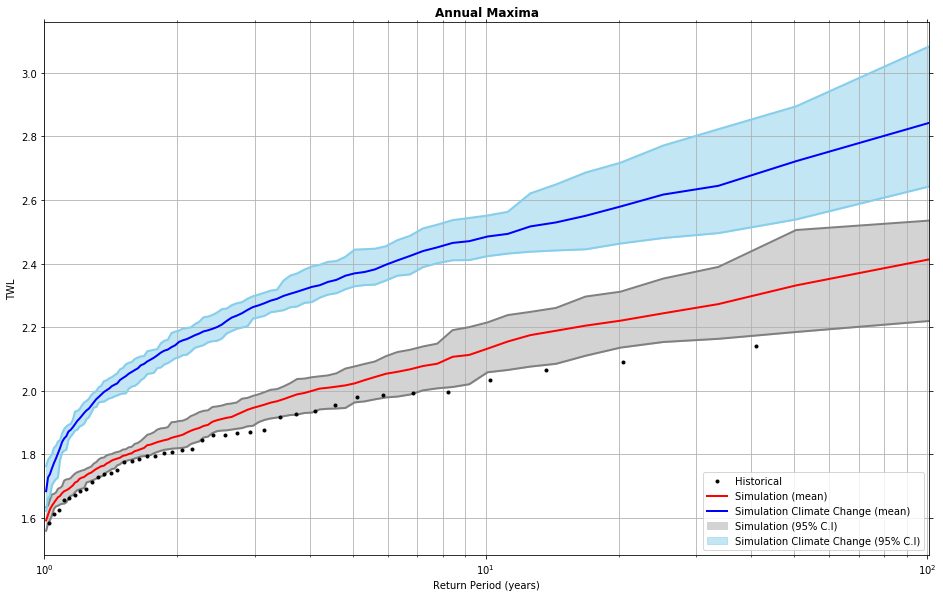

In [7]:
sim_B = SIM_C_h_CChange_S1['TWL'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation_CC(hist_A, sim_A.transpose(), sim_B.transpose());


### SLR S2 (intermediate, +1m)

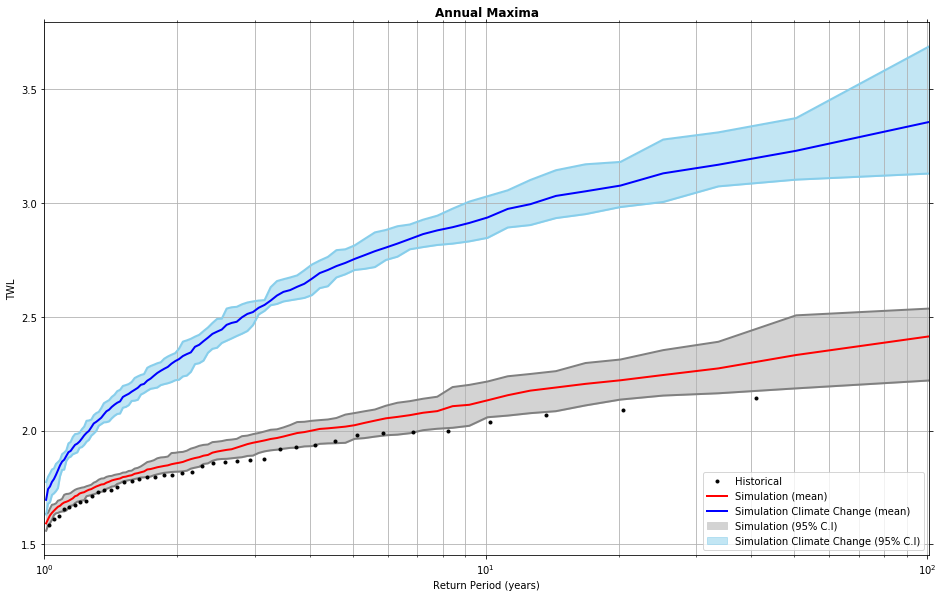

In [8]:
sim_B = SIM_C_h_CChange_S2['TWL'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation_CC(hist_A, sim_A.transpose(), sim_B.transpose());

### SLR S3 (intermediate high, +1.5m)


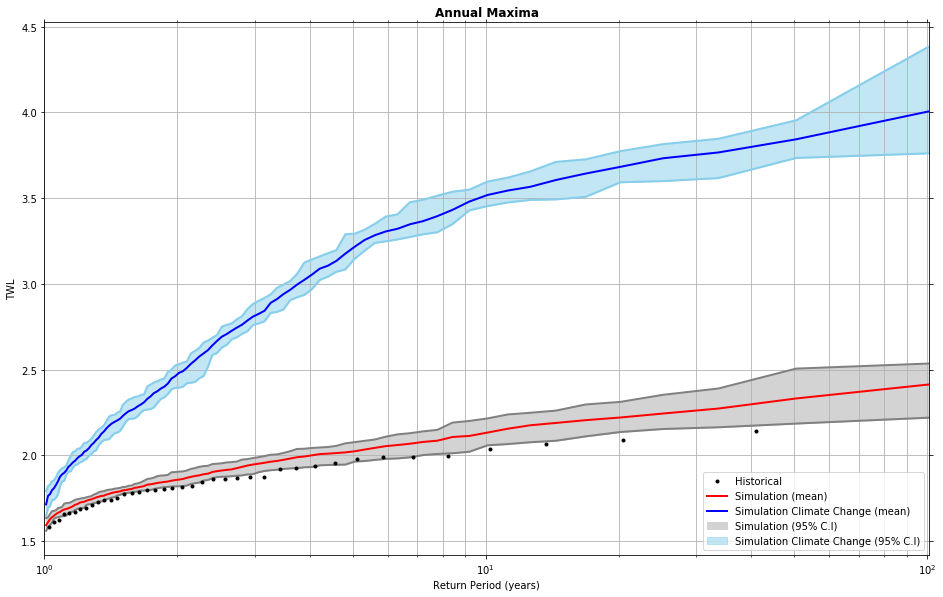

In [9]:
sim_B = SIM_C_h_CChange_S3['TWL'].groupby('time.year').max(dim='time')

# Return Period historical vs. simulations
Plot_ReturnPeriodValidation_CC(hist_A, sim_A.transpose(), sim_B.transpose());